In [44]:
## Importing necessary Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

## Importing data and analyzing it

In [2]:
dfcustret = pd.read_csv("C:/Users/kulka/AnacondaJunior/HW5/retail_transactions.csv", encoding= 'unicode_escape')
dfcustret.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
dfcustret.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Finding the numerical and categorical data to convert

In [5]:
dfcustret.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [58]:
colsNum = [ col for col in dfcustret.columns if dfcustret[col].dtypes in ['int64','float64']]
print(colsNum)

['Quantity', 'UnitPrice', 'CustomerID']


In [59]:
X1=dfcustret.iloc[:,[3,5,6]]
X1.head()

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0


In [60]:
colsNum1 = [ col for col in dfcustret.columns if dfcustret[col].dtypes in ['object']]
print(colsNum1)

['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']


## Convering categorical data to numerical

In [61]:
X2=pd.get_dummies(colsNum1)
X2.head()

,Country,Description,InvoiceDate,InvoiceNo,StockCode
0,0,0,0,1,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


## Combinging converted categorical data with original data to normalize and find optimal cluster values

In [62]:
Newdfcustret=pd.concat([X1,X2],axis=1)
Newdfcustret.fillna(Newdfcustret.mean(), inplace=True)
Newdfcustret.head()

,Quantity,UnitPrice,CustomerID,Country,Description,InvoiceDate,InvoiceNo,StockCode
0,6,2.55,17850.0,0.0,0.0,0.0,1.0,0.0
1,6,3.39,17850.0,0.0,0.0,0.0,0.0,1.0
2,8,2.75,17850.0,0.0,1.0,0.0,0.0,0.0
3,6,3.39,17850.0,0.0,0.0,1.0,0.0,0.0
4,6,3.39,17850.0,1.0,0.0,0.0,0.0,0.0


In [63]:
Newdfcustret.dtypes

Quantity         int64
UnitPrice      float64
CustomerID     float64
Country        float64
Description    float64
InvoiceDate    float64
InvoiceNo      float64
StockCode      float64
dtype: object

## Dropping null values due to error

In [64]:
cols_num_null = [col for col in Newdfcustret.columns if Newdfcustret[col].isnull().any()]
print(cols_num_null)

[]


In [65]:
Newdfcustret_drpnull = Newdfcustret.drop(cols_num_null, axis=1)

## Normalizing data 

In [66]:
normalized_Newdfcustret_drpnull = normalize(Newdfcustret_drpnull) 

## Finding optimal cluster values

In [67]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_Newdfcustret_drpnull)
    Sum_of_squared_distances.append(km.inertia_)

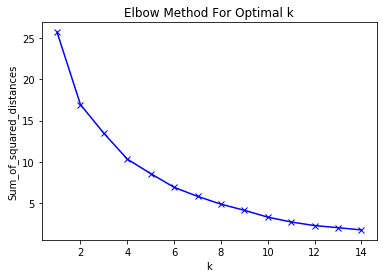

In [68]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### 4 seems like the optimial number

## Running K-Mean clustering for entire data set

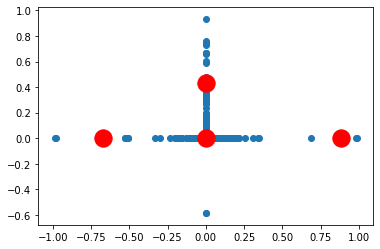

In [41]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(normalized_Newdfcustret_drpnull)
plt.scatter(normalized_Newdfcustret_drpnull[:,0], normalized_Newdfcustret_drpnull[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()